# Introduction

### Import Librarries

In [35]:
import numpy as np #linear algebra
import pandas as pd  #data processing e.g. reading files (pd.read_csv)
import matplotlib.pyplot as plt #plotting and visualization
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

### Import the Dataset

In [36]:
#Read in the data
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [37]:
#Check for the shape of the data
data.shape

(500, 9)

In [38]:
#Check for the head of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
#Rename some of the column names
data.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letter of Recommendation', 'Cumulative GPA',
       'Research', 'Chance of Admit']

In [41]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,Cumulative GPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratory Data Analysis

In [42]:
data.dtypes

Serial No.                    int64
GRE Score                     int64
TOEFL Score                   int64
University Rating             int64
Statement of Purpose        float64
Letter of Recommendation    float64
Cumulative GPA              float64
Research                      int64
Chance of Admit             float64
dtype: object

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.                  500 non-null int64
GRE Score                   500 non-null int64
TOEFL Score                 500 non-null int64
University Rating           500 non-null int64
Statement of Purpose        500 non-null float64
Letter of Recommendation    500 non-null float64
Cumulative GPA              500 non-null float64
Research                    500 non-null int64
Chance of Admit             500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [44]:
#Check for missing values in the dataset
data.isnull().sum()

Serial No.                  0
GRE Score                   0
TOEFL Score                 0
University Rating           0
Statement of Purpose        0
Letter of Recommendation    0
Cumulative GPA              0
Research                    0
Chance of Admit             0
dtype: int64

*** There are no null or missing values in dataset ***

*** Most of the variables in the dataset are good for the analysis except the Serial No.column. That column will need to be dropped. ***

In [45]:
data = data.iloc[:, 1:]

In [46]:
data.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,Cumulative GPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
data.shape

(500, 8)

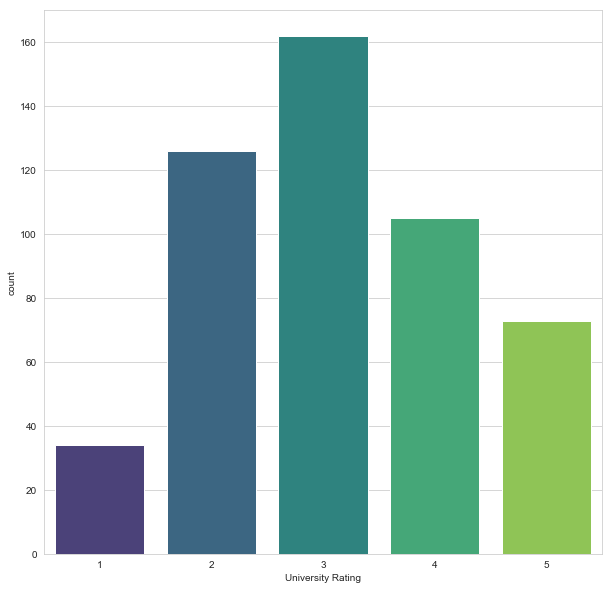

In [48]:
#Explore university ratings
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(data['University Rating'], palette = 'viridis')

*** From the countplot we can see that most of the universities are rated between 2 and ***

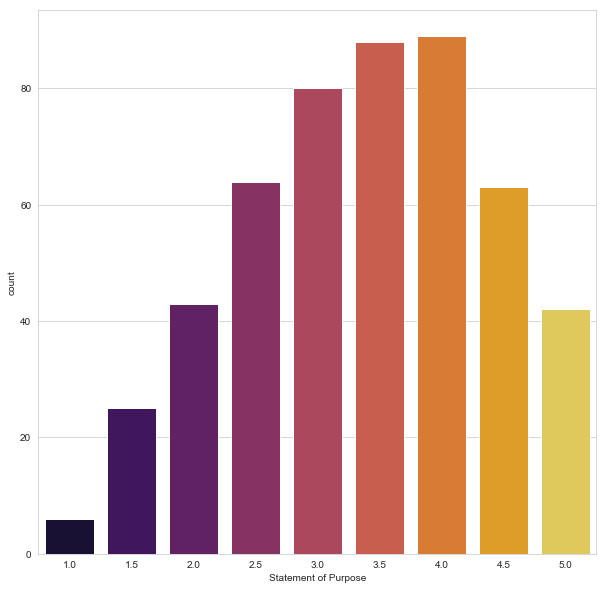

In [49]:
#Explore the statement of purpose scores
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x = 'Statement of Purpose', data = data, palette = 'inferno')

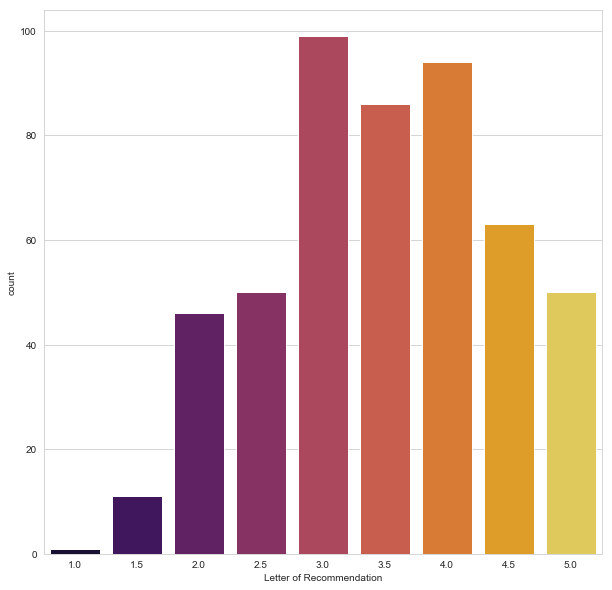

In [50]:
#Explore the Letter of Recommendation scores
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x = 'Letter of Recommendation', data = data, palette = 'inferno')

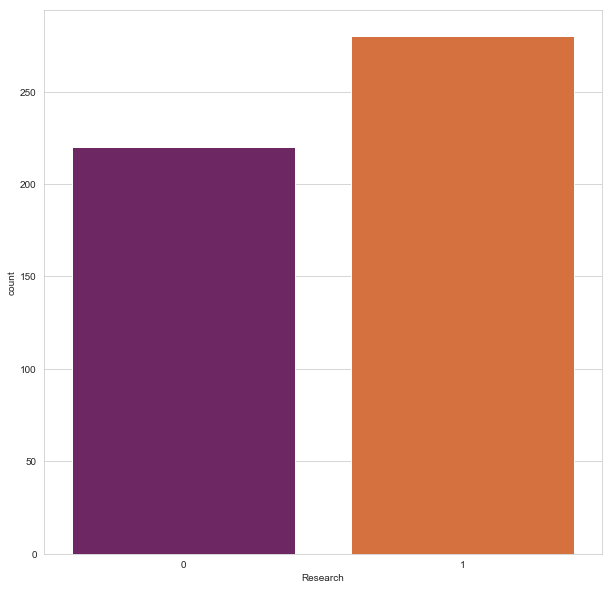

In [51]:
#Explore students with reserach experience
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(data['Research'], palette = 'inferno')

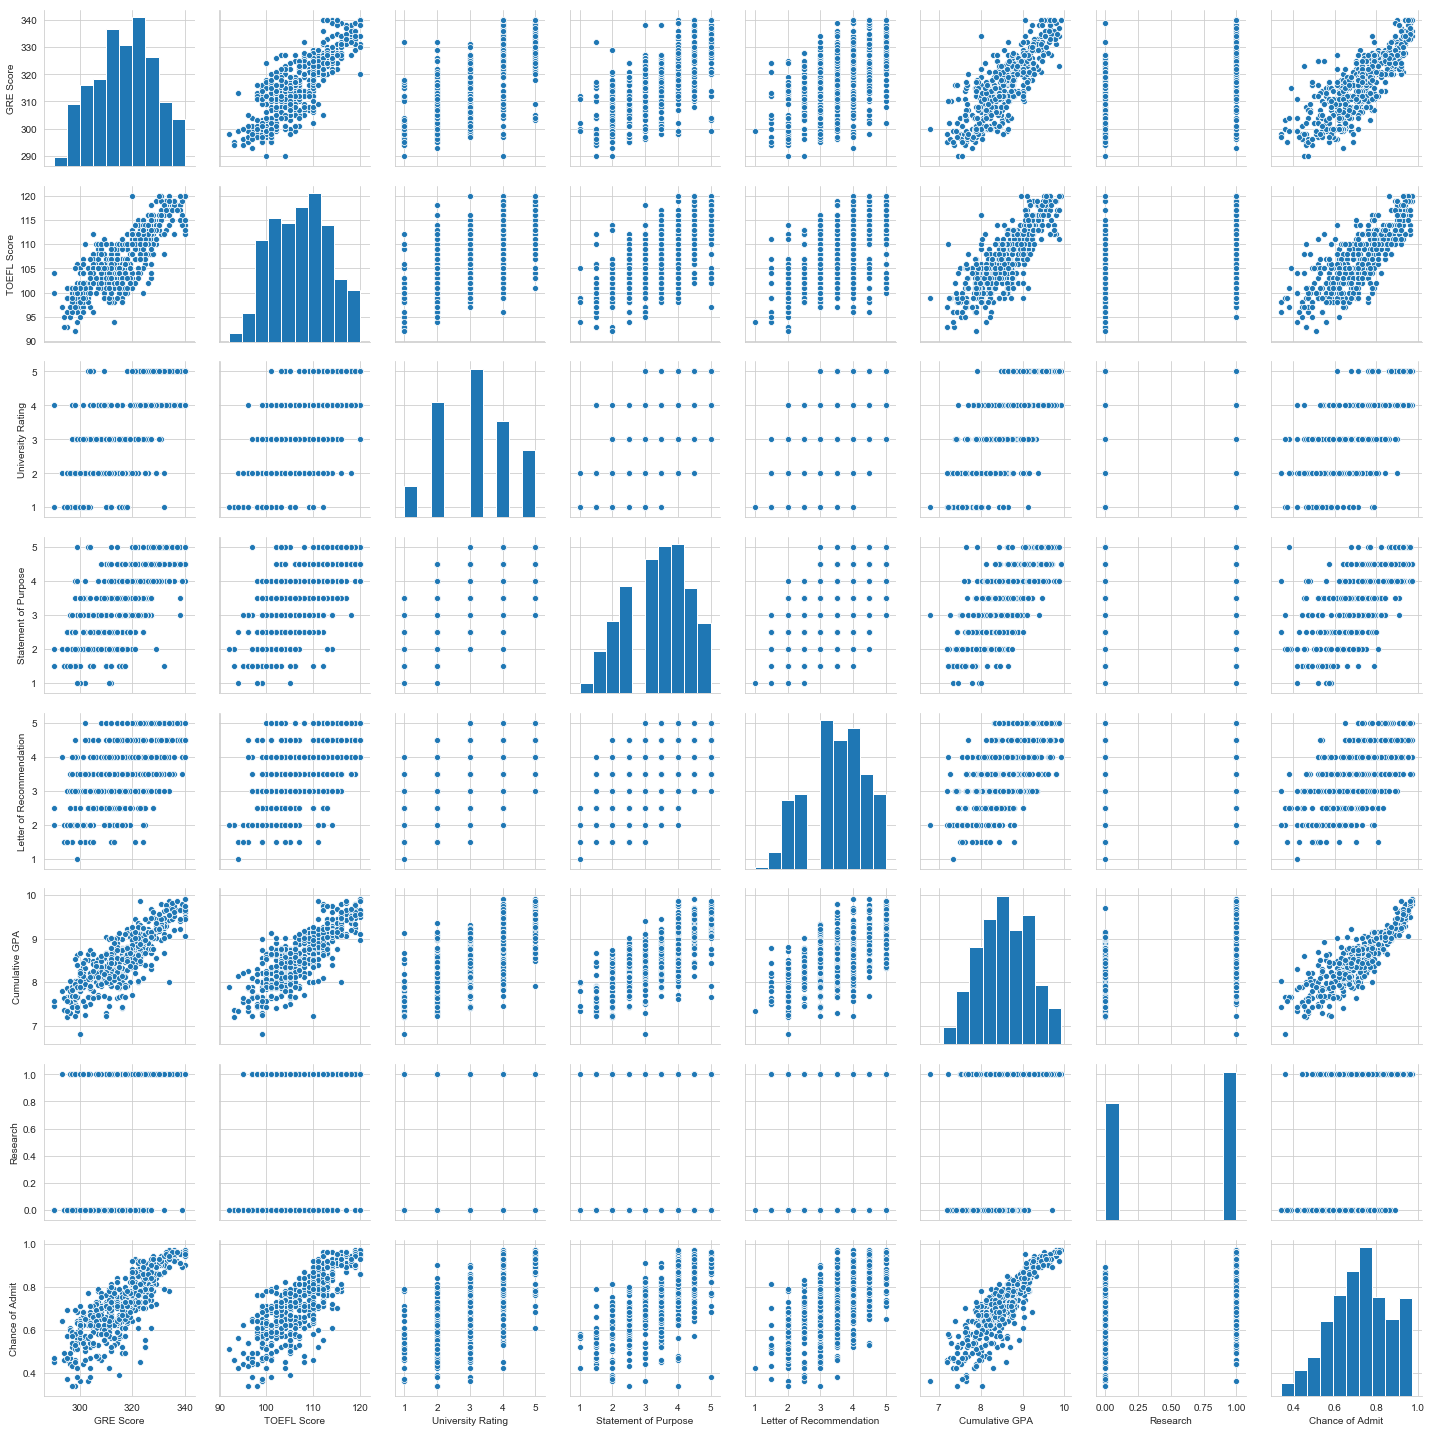

In [52]:
sns.pairplot(data)

We will look at the distribution of the variable we are trying to predict(Chance of Admit)

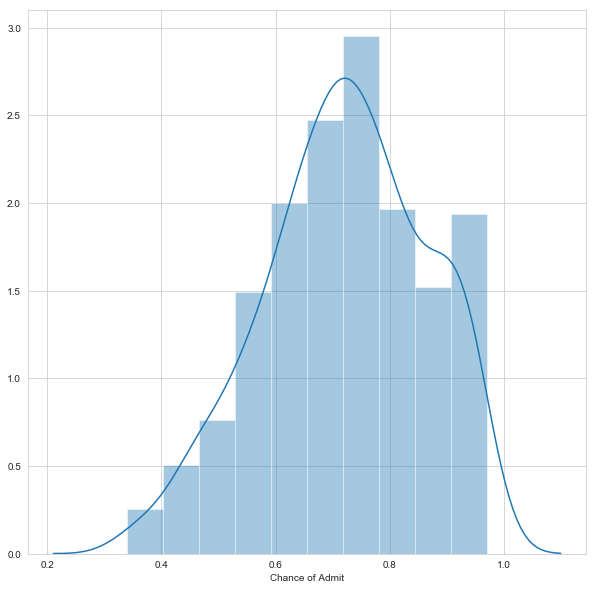

In [53]:
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data['Chance of Admit'], kde = True, bins = 10)

The Chance of Admit variable is a little skewed to the left

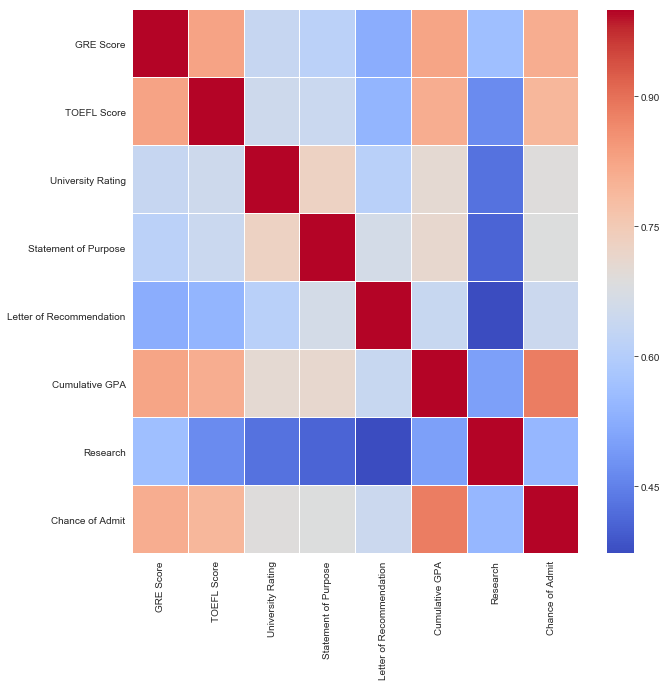

In [54]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, linewidths=0.05, cmap= 'coolwarm')

In [55]:
pd.DataFrame(data.corr()['Chance of Admit'].round(2))

,Chance of Admit
GRE Score,0.81
TOEFL Score,0.79
University Rating,0.69
Statement of Purpose,0.68
Letter of Recommendation,0.65
Cumulative GPA,0.88
Research,0.55
Chance of Admit,1.00


### Splitting Dataset into Training Set and Test Set

In [56]:
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letter of Recommendation', 'Cumulative GPA','Research']]

y = data['Chance of Admit']

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\filas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\filas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)


In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 7)
(125, 7)
(375,)
(125,)


In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predictions  = regressor.predict(X_test)

In [62]:
predictions

array([0.80774511, 0.93373071, 0.52976832, 0.62138376, 0.81655201,
       0.69984612, 0.87387583, 0.7751117 , 0.61983294, 0.8838204 ,
       0.90173511, 0.76276487, 0.95395608, 0.58740714, 0.68943885,
       0.83566784, 0.51887152, 0.77111505, 0.94019384, 0.61948194,
       0.57322266, 0.75022983, 0.85141621, 0.69184883, 0.82711626,
       0.64997527, 0.57941264, 0.62752886, 0.97246449, 0.88097935,
       0.53461025, 0.71237486, 0.65849363, 0.64763547, 0.47339456,
       0.84954579, 0.85414231, 0.78219536, 0.94054611, 0.61390412,
       0.63561819, 0.71927303, 0.66296345, 0.90778853, 0.80660372,
       0.71821451, 0.64656181, 0.67800457, 0.96253369, 0.84523095,
       0.75475048, 0.56111117, 0.63903551, 0.69010857, 0.55326866,
       0.54494416, 0.68634245, 0.50913426, 0.59110405, 0.68866011,
       0.88231457, 0.84453779, 0.7848251 , 0.53771872, 0.62241072,
       0.90512033, 0.88571155, 0.84482289, 0.83283004, 0.88637224,
       0.63737988, 0.75706573, 0.62650146, 0.83494857, 0.55922

Text(0, 0.5, 'Predicted Values')

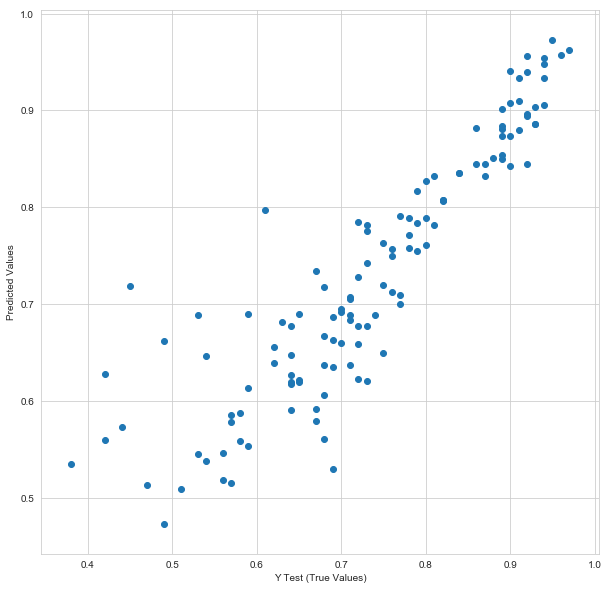

In [66]:
fig,ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, predictions)
plt. xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

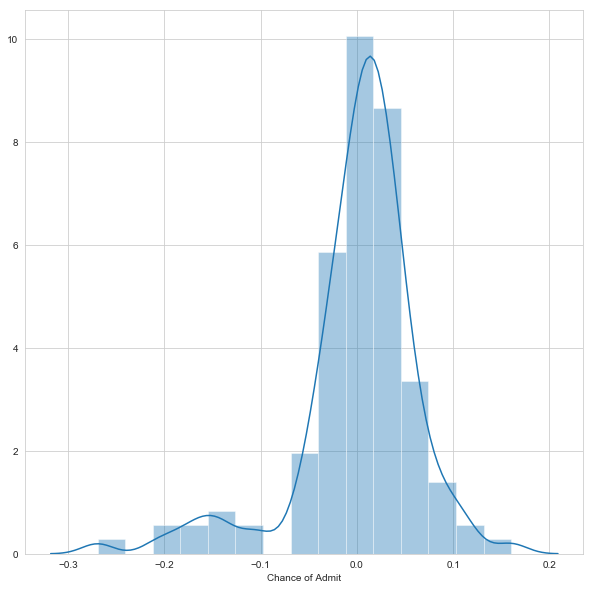

In [76]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.distplot((y_test - predictions), bins = 15)

# Evaluating the Model

In [67]:
from sklearn import metrics

In [71]:
print ('MAE ', metrics.mean_absolute_error(y_test, predictions))
print ('MSE ', metrics.mean_squared_error(y_test, predictions))
print ('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE  0.042301304332818854
MSE  0.003913833546452721
RMSE  0.0625606389549589
